In [27]:
from scripts.imports import *
from scripts.show_tracks import *
from scripts.track_pairs import *
import geopandas as gpd
from shapely.geometry import Point, box as shapely_box
from scipy.optimize import least_squares
from sklearn.metrics import r2_score, mean_squared_error
from scripts.odr import *

import sys

# sys.path.insert(1,'/home/s1803229/src/PhoREAL')
sys.path.insert(1,'C:/Users/s1803229/Documents/PhoREAL')

from phoreal.reader import get_atl03_struct, get_atl08_struct

dirpath = '../data/sodankyla_cam'
all_ATL03, all_ATL08 = track_pairs(dirpath)

N = len(all_ATL03)
# print(all_ATL03[0],all_ATL08[0])
for i in range(0,1):
#     pvpg(all_ATL03[i], all_ATL08[i],i)
    atl03 = get_atl03_struct(all_ATL03[i], 'gt3r', all_ATL08[i])
    atl08 = get_atl08_struct(all_ATL08[i], 'gt3r')

# print(atl03.df.columns.values.tolist())
# print(atl08.df.columns.values.tolist())

atl08.df

,asr,atlas_pa,beam_azimuth,beam_coelev,brightness_flag,can_noise,canopy_h_metrics_0,canopy_h_metrics_1,canopy_h_metrics_2,canopy_h_metrics_3,...,subset_te_flag_3,subset_te_flag_4,terrain_slope,terrain_flg,urban_flag,time,easting,northing,crosstrack,alongtrack
0,0.360345,0.003437,1.491565,1.567359,0,3.402823e+38,3.402823e+38,3.402823e+38,3.402823e+38,3.402823e+38,...,1,1,0.000463,0,0,0.000000,-1.194628e+06,8.083467e+06,0.000000e+00,0.000000
1,0.360345,0.003437,1.491459,1.567359,0,7.731801e-02,5.695496e-01,5.798340e-01,6.049194e-01,6.259766e-01,...,1,1,0.040233,1,0,0.014068,-1.194703e+06,8.083396e+06,1.828126e-02,103.722243
2,0.360345,0.003438,1.491228,1.567359,0,7.529623e-02,9.877014e-01,2.119308e+00,2.507477e+00,2.649994e+00,...,1,1,-0.003021,0,0,0.028108,-1.194779e+06,8.083325e+06,3.715751e-02,207.444844
3,0.323276,0.003437,1.491404,1.567359,0,9.626171e-02,7.160645e-01,3.072678e+00,3.090485e+00,3.310379e+00,...,1,1,-0.004760,0,0,0.042246,-1.194854e+06,8.083253e+06,-1.962642e-01,311.138480
4,0.323276,0.003437,1.491303,1.567359,0,6.420947e-02,1.874115e+00,2.358536e+00,2.813141e+00,2.909897e+00,...,1,1,0.000068,0,0,0.056316,-1.194929e+06,8.083183e+06,-7.478866e-02,413.987047
5,0.361272,0.003438,1.491178,1.567359,0,4.768692e-02,2.183701e+00,2.183701e+00,2.186661e+00,2.186661e+00,...,1,1,0.006207,0,0,0.070378,-1.195004e+06,8.083112e+06,1.144701e-01,517.730264
6,0.361272,0.003438,1.491369,1.567359,0,3.402823e+38,3.402823e+38,3.402823e+38,3.402823e+38,3.402823e+38,...,1,1,-0.007180,0,0,0.084513,-1.195080e+06,8.083040e+06,1.357218e-01,621.454290
7,0.361272,0.003437,1.491422,1.567359,0,3.402823e+38,3.402823e+38,3.402823e+38,3.402823e+38,3.402823e+38,...,1,1,-0.000800,0,0,0.098621,-1.195155e+06,8.082969e+06,-1.105422e-02,725.159123
8,0.368551,0.003438,1.491335,1.567359,0,1.134089e-01,2.710678e+00,2.907730e+00,2.907730e+00,4.768967e+00,...,1,1,-0.002803,0,0,0.112694,-1.195230e+06,8.082898e+06,-7.293427e-02,828.874088
9,0.368551,0.003438,1.491329,1.567358,0,8.031856e-02,2.851868e+00,3.871201e+00,5.622528e+00,5.622528e+00,...,1,1,-0.010021,0,0,0.126783,-1.195305e+06,8.082827e+06,2.201427e-01,931.743975


In [48]:
from scripts.imports import *
from scripts.show_tracks import *
from scripts.track_pairs import *
import geopandas as gpd
from shapely.geometry import Point, box as shapely_box
from scipy.optimize import least_squares
from sklearn.metrics import r2_score, mean_squared_error
from scripts.odr import *

import sys

# sys.path.insert(1,'/home/s1803229/src/PhoREAL')
sys.path.insert(1,'C:/Users/s1803229/Documents/PhoREAL')

from phoreal.reader import get_atl03_struct, get_atl08_struct

def divide_arrays_2(X, Y):
    # Combine X and Y into a list of tuples
    combined = list(zip(X, Y))
    
    # Sort the combined list based on X values
    combined.sort(key=lambda tup: tup[0])
    
    # Calculate the midpoint
    midpoint = len(combined) // 2
    
    # Divide the combined list into lower and upper halves
    lower_half = combined[:midpoint]
    upper_half = combined[midpoint:]
    
    # Unzip the lower and upper halves into separate X and Y arrays
    lower_X, lower_Y = zip(*lower_half)
    upper_X, upper_Y = zip(*upper_half)
    
    return lower_X, lower_Y, upper_X, upper_Y

def divide_arrays_3(X, Y):
    # Combine X and Y into a list of tuples
    combined = list(zip(X, Y))
    
    # Sort the combined list based on X values
    combined.sort(key=lambda tup: tup[0])
    
    # Calculate the midpoint
    tripoint = len(combined) // 3
    
    # Divide the combined list into lower and upper halves
    lower_half = combined[:tripoint]
    upper_half = combined[2*tripoint:]
    
    # Unzip the lower and upper halves into separate X and Y arrays
    lower_X, lower_Y = zip(*lower_half)
    upper_X, upper_Y = zip(*upper_half)
    
    return lower_X, lower_Y, upper_X, upper_Y

def intercept_from_slope_and_point(slope, point):
    x1, y1 = point
    intercept = y1 - slope * x1
    return intercept

def find_slope_and_intercept(x1, y1, x2, y2):
    # Calculate slope
    slope = (y2 - y1) / (x2 - x1)
    
    # Calculate y-intercept
    intercept = y1 - slope * x1
    
    return slope, intercept

def parse_filename_datetime(filename):
    # Extracting only the filename from the full path
    filename_only = filename.split('/')[-1]
    
    # Finding the index of the first appearance of 'ATL03_' or 'ATL08_'
    atl03_index = filename_only.find('ATL03_')
    atl08_index = filename_only.find('ATL08_')
    
    # Determining the split index based on which string appears first or if neither is found
    split_index = min(filter(lambda x: x >= 0, [atl03_index, atl08_index]))

    # Extracting yyyymmddhhmmss part
    date_str = filename_only[split_index + 6:split_index + 20]
    
    datetime_obj = datetime.strptime(date_str, '%Y%m%d%H%M%S')
    return datetime_obj

def datetime_to_title(datetime_obj):
    return datetime_obj.strftime('%B %d, %Y, %H:%M:%S')

def make_box(coords, width=0.25, height=0.25):
    w = width
    h = height
    polygon = gpd.GeoDataFrame(geometry=[shapely_box(coords[0]-w/np.cos(np.radians(coords[1])), coords[1]-h, coords[0]+w/np.cos(np.radians(coords[1])), coords[1]+h)], crs="EPSG:4326")

    return polygon

def plot(df, ax):
    """
    Plot function for the ground tracks.
    
    df - Dataframe generated by get_atl03_struct
    ax - Axis on which to plot the relevant figure
    """
    class_dict = {-1: {'color':cmap(0.98),
                       'name':'Unclassified'},
                   0: {'color':cmap(0.2),
                       'name':'Noise'},
                   1: {'color':cmap(0.8),
                       'name':'Ground'},
                   2: {'color':cmap(0.4),
                       'name':'Canopy'},
                   3: {'color':cmap(0.6),
                       'name':'Top of canopy'}}

    if 'classification' in df.columns:
        for c in np.unique(df.classification):
            mask = df.classification==c
            ax.scatter(df[mask].lat_ph,
                       df[mask].h_ph,
                       color=class_dict[c]['color'],
                       label=class_dict[c]['name'],
                       s = 3)

            ax.legend(loc='best')
    else:
            ax.scatter(df.lat_ph,
                      df.h_ph,
                      s = 3)
    ax.set_xlabel('Latitude (°)')
    ax.set_ylabel('Elevation (m)')
    return

# This function is called if the graph_detail is set to 2!
# I know I used different coding structure for this one but
# all I can really say is whoops and move on.
def plot_parallel(atl03s, coefs, colors, title_date, X, Y, beam = None, canopy_frac = None, terrain_frac = None, file_index=None, three=None):
    """
    Plotting function of pvpg_parallel. Shows a regression line for each available groudntrack in a bigger plot, as well as groundtrack visualisations in a smaller plot.
    
    atl03s - This is an array of ATL03 objects, one for each groundtrack that was successfully turned into an object. If only Beams 5 and 6 exist, then this has two objects in it, one for each of those beams.
    coefs - Array of parameters that are optimized, starting with the slope in coefs[0] and another parameter for each beam to control the y-intercept.
    colors - This holds the integers minus one of the beams that have groundtracks in the file. This is to keep the coloring in the plots consistent for each beam across all files.
    title_date - This is just the data and time of the ICESat-2 overpass. The parse_filename_datetime() function will take care of this for you.
    X - Array of each Eg dataset, [[data1],[data2],...]. This always has six arrays in it, one for each groundtrack from Beam 1 to Beam 6. If nothing is read, you get an empty array [], e.g. [[data1],[],[data3],...]
    Y - Array of each Ev dataset, see X description.
    beam - An array of beams to focus on. For example, if you only want to see pv/pg information on the plot for Beams 3 and 4, then you would set beam = [3,4]. Default is None, and all beams are shown.
    file_index - Default set to None. If changed, this will show the index of the file in an array of all ATL03 file paths so that it is easy to find and focus on interesting cases. Works if you are in a loop of filepaths and you need to know which one is being funky.
    canopy_frac - Default is None. If changed, this will say in the title of the groundtrack what percentage of the data has canopy photon data. Low canopy fraction could indicate poor quality data. This is only displayed if Detail = 2.
    """

    # Simple array of all the beam names
    beam_names = [f"Beam {i}" for i in range(1,7)]
    
    # Six small figures for groundtracks and one for the pv/pg plot
    fig = plt.figure(figsize=(10, 12))
    if three == None:
        ax1 = fig.add_subplot(331)
        ax2 = fig.add_subplot(332)
        ax3 = fig.add_subplot(334)
        ax4 = fig.add_subplot(335)
        ax5 = fig.add_subplot(337)
        ax6 = fig.add_subplot(338)
        ax7 = fig.add_subplot(133)
    else:
        ax1 = fig.add_subplot(321)
        ax2 = fig.add_subplot(322)
        ax3 = fig.add_subplot(323)
        ax4 = fig.add_subplot(324)
        ax5 = fig.add_subplot(325)
        ax6 = fig.add_subplot(326)
    axes = [ax1, ax2, ax3, ax4, ax5, ax6]
    
    # Set the figure title
    if file_index != None:
        fig.suptitle(title_date + ' - N = ' + str(file_index), fontsize=16)
    else:
        fig.suptitle(title_date, fontsize=16)
    
    # we go through each color and atl03 object together.
    # In this loop, we plot all of the groundtracks where they belong
    # depending on which beam it is and plot the data in the scatterplot
    for i, c, atl03 in zip(np.arange(len(colors)),colors, atl03s):
        
        # If there's a canopy fraction wanted, we stick it in the title
        if (canopy_frac != None) & (terrain_frac != None):
            axes[c].set_title(f"{beam_names[c]} - TF = {round(terrain_frac[c],2)}, CF = {round(canopy_frac[c],2)}")
            plot(atl03.df, axes[c])
        
        elif canopy_frac != None:
            axes[c].set_title(f"{beam_names[c]} - CF = {round(canopy_frac[c],2)}")
            plot(atl03.df, axes[c])
        
        elif terrain_frac != None:
            axes[c].set_title(f"{beam_names[c]} - TF = {round(terrain_frac[c],2)}")
            plot(atl03.df, axes[c])
        
        else:
            axes[c].set_title(f"{beam_names[c]}")
            plot(atl03.df, axes[c])
        
        # If there's a focus on certain beams, we run this if statement to
        # check if the current beam is in the list of beams the user wants.
        # Then we throw the data onto the scatterplot with the color of choice
        # along with a regression line of the same color
        if three == None:
        
            if beam != None:
                if c + 1 in beam:
                    ax7.scatter(X[c],Y[c], s=5, color=cmap2(c))
                    ax7.plot(np.array([0,12]), model([coefs[0], coefs[1+i]], np.array([0,12])), label=f"Beam {int(c+1)}", color=cmap2(c), linestyle='--', zorder=3)
            else:
                ax7.scatter(X[c],Y[c], s=5, color=cmap2(c))
                ax7.plot(np.array([0,12]), model([coefs[0], coefs[1+i]], np.array([0,12])), label=f"Beam {int(c+1)}", color=cmap2(c), linestyle='--', zorder=3)
    
    
    if three == None:        
        # Show the pv/pg estimate on the plot
        ax7.annotate(r'$\rho_v/\rho_g \approx {:.2f}$'.format(-coefs[0]),
                       xy=(.35,.98),
                       xycoords='axes fraction',
                       ha='right',
                       va='top',
                       fontsize=8,
                       bbox=dict(boxstyle="round,pad=0.3",
                                 edgecolor="black",
                                 facecolor="white"))
    
        # Set all the boring plot details
        ax7.set_title(f"Ev/Eg Rates", fontsize=8)
        ax7.set_xlabel('Eg (returns/shot)')
        ax7.set_ylabel('Ev (returns/shot)')
        ax7.set_xlim(0,8)
        ax7.set_ylim(0,40)
        ax7.legend(loc='best')
    
    plt.tight_layout(rect=[0, 0, 1, 0.97])  # Adjust the layout to make room for the suptitle
    plt.show()
    return

# This corresponds to graph_detail = 1
def plot_graph(coefs, colors, title_date, X, Y, beam = None, file_index=None):
    """
    Plotting function of pvpg_parallel. Shows a regression line for each available groudntrack in a bigger plot, as well as groundtrack visualisations in a smaller plot.
    
    coefs - Array of parameters that are optimized, starting with the slope in coefs[0] and another parameter for each beam to control the y-intercept.
    colors - This holds the integers minus one of the beams that have groundtracks in the file. This is to keep the coloring in the plots consistent for each beam across all files.
    title_date - This is just the data and time of the ICESat-2 overpass. The parse_filename_datetime() function will take care of this for you.
    X - Array of each Eg dataset, [[data1],[data2],...]. This always has six arrays in it, one for each groundtrack from Beam 1 to Beam 6. If nothing is read, you get an empty array [], e.g. [[data1],[],[data3],...]
    Y - Array of each Ev dataset, see X description.
    beam - An array of beams to focus on. For example, if you only want to see pv/pg information on the plot for Beams 3 and 4, then you would set beam = [3,4]. Default is None, and all beams are shown.
    file_index - Default set to None. If changed, this will show the index of the file in an array of all ATL03 file paths so that it is easy to find and focus on interesting cases. Works if you are in a loop of filepaths and you need to know which one is being funky.
    """
    
    # Big plot that we want
    fig = plt.figure(figsize=(10, 6))
    
    # Set the figure title
    if file_index != None:
        fig.suptitle(title_date + ' - N = ' + str(file_index), fontsize=16)
    else:
        fig.suptitle(title_date, fontsize=16)
    
    # Plot the data and the regression lines. If the beam parameter is active,
    # then only for the beams of interest
    for i, c in enumerate(colors):
        if beam != None:
            if c + 1 in beam:
                # scatter
                plt.scatter(X[c],Y[c], s=5, color=cmap2(c))
                # regress
                plt.plot(np.array([0,12]), model([coefs[0], coefs[1+i]], np.array([0,12])), label=f"Beam {int(c+1)}", color=cmap2(c), linestyle='--', zorder=3)
        else:
            #scatter
            plt.scatter(X[c],Y[c], s=5, color=cmap2(c))
            #regress
            plt.plot(np.array([0,12]), model([coefs[0], coefs[1+i]], np.array([0,12])), label=f"Beam {int(c+1)}", color=cmap2(c), linestyle='--', zorder=3)
    # Display the pv/pg estimate
    plt.annotate(r'$\rho_v/\rho_g \approx {:.2f}$'.format(-coefs[0]),
                   xy=(.081,.98),
                   xycoords='axes fraction',
                   ha='right',
                   va='top',
                   fontsize=8,
                   bbox=dict(boxstyle="round,pad=0.3",
                             edgecolor="black",
                             facecolor="white"))
    
    # Do all the boring plot display stuff
    plt.title(f"Ev/Eg Rates", fontsize=8)
    plt.xlabel('Eg (returns/shot)')
    plt.ylabel('Ev (returns/shot)')
    plt.xlim(0,8)
    plt.ylim(0,8)
    plt.legend(loc='best')
    
    plt.tight_layout(rect=[0, 0, 1, 0.97])  # Adjust the layout to make room for the suptitle
    plt.show()

def parallel_model(params, x):
    # print(x)
    # print(params)
    common_slope, *parallel = params

    # Get all columns starting with 'Beam'
    beam_columns = [col for col in x.columns if col.startswith('Beam')]
    return common_slope*x['Eg'] + np.dot(x[beam_columns], parallel)

def parallel_residuals(params, x, y, model = parallel_model):
    model_output = model(params, x)
    # print(y.T.values[0])
    return (y.T.values[0] - model_output)/np.sqrt(1 + params[0]**2)

def parallel_odr(dataset, intercepts, maxes, init = -1, lb = -100, ub = -1/100, model = parallel_model, res = parallel_residuals, loss='arctan', f_scale=.1):
    """
    Performs the parallel orthogonal distance regression on the given dataset.
    
    dataset - Pandas Dataframe with columns Eg, Ev, and Beam _ for each beam with data.
    maxes - Array that holds the initial y_intercept guess for each beam. If only Beams 5 and 6 made it, then there are only two values in this array.
    init - Initial slope guess
    lb - Lower bound constraint for slope
    ub - Upper bound constraint for slope
    model - Model to estimate Ev and Eg.
    res - Residuals to put into least_squares function
    loss - Loss function in regression
    f_scale - f_scale parameter for least_squares, affects how much it cares about outliers.
    """
   
    # cats is the number of groundtracks that have data that we could read
    cats = dataset.shape[1]-2
    
    # a is the lower bound of the parameters, [slope, intercept_for_first_dataset, etc.]
    # b is the upper bound, same setup.
    # We then put it together into a bounds variable that we can use in least_squares()
    a = [lb] + [0]*cats
    b = [ub] + maxes
    bounds = (a,b)
    
    # Initial guess [slope, y_intercept_first_dataset, y_intercept_second_dataset, etc.]
    initial_params = [init] + intercepts
    
    # Just like in machine learning, we drop Y from the data to be our dependent variable
    # and we keep everything else, our features, in X.
    X = dataset.drop(columns=['Ev'])
    Y = dataset[['Ev']]

    # print(initial_params)


    if loss == 'linear':
        params = least_squares(res, x0=initial_params, args=(X, Y, model), loss = loss, bounds=bounds).x
    
    # We call least_squares to do the heavy lifting for us.
    else:
        params = least_squares(res, x0=initial_params, args=(X, Y, model), loss = loss, f_scale=f_scale, bounds = bounds, ftol=1e-15, xtol=1e-15, gtol=1e-15).x
    
    # Return the resulting coefficients
    return params

def pvpg_parallel(atl03path, atl08path, coords, width=.1, height=.1, f_scale = .1, loss = 'arctan', init = -.6, lb = -np.inf, ub = 0,\
    file_index = None, model = parallel_model, res = parallel_residuals, odr = parallel_odr, zeros=None,\
    beam = None, y_init = np.max, graph_detail = 0, canopy_frac = None, terrain_frac = None, keep_flagged=True, opsys='bad', altitude=None,
                 alt_thresh=200, threshold = 2):
    """
    Parallel regression of all tracks on a given overpass.

    atl03path - Path/to/ATL03/file
    atl08path - Path/to/matching/ATL08/file
    f_scale - Parameter in least_squares() function when loss is nonlinear, indiciating the value of the soft margin between inlier and outlier residuals.
    loss - string for loss parameter in least_squares().
    init - initial slope guess for the parallel slope parameter
    lb - Lower bound of allowed value for the slope of the regression, default -100
    ub - Upper bound of allowed value for the slope of the regression, default -1/100
    file_index - Index of file if cycling through an array of filenames, displayed in figure titles for a given file. Allows us to easily pick out strange cases for investigation.
    model - model function to be used in least squares. Default is the parallel model function
    res - Default holds the ODR residuals function to be used in least_squares(). Can hold adjusted residual functions as well.
    odr - function that performs the orthogonal regression. Replace with great care if you do.
    zeros - Default is None. If changed, this will keep all the canopy height = 0 and Ev = 0 outliers in the data.
    beam - Default is None. Put in input in the form of an array of integers. For example, if you only want to display pv/pg on the plot for Beams 3 and 4, the input is [3,4]
    y_init - This is the function used to initialize the guess for the y intercept. Default is simply the maximum value, as this is expected to correspond with the data point closest to the y-intercept.
    graph_detail - Default is 0. If set to 1, will show a single pv/pg plot for all chosen, available beams. If set to 2, will also show each available groundtrack.
    canopy_frac - Default is None. If changed, this will say in the title of the groundtrack what percentage of the data has canopy photon data. Low canopy fraction could indicate poor quality data. This is only displayed if Detail = 2.
    keep_flagged - Default is True. If None, we throw out tracks that have segments with zero photon returns.
    """
    
    polygon = make_box(coords, width,height)
    min_lon, min_lat, max_lon, max_lat = polygon.total_bounds
    
    # This will hold all of the data in one place:
    # [[Eg, Ev, Beam 1],...[Eg,Ev,Beam 1],[Eg,Ev,Beam 2],...,[Eg,Ev,Beam6],[Eg,Ev,Beam 6]]
    # This will be made into a dataframe later.
    meanEgstrong = []
    meanEgweak = []
    meanEvstrong = []
    meanEvweak = []

    msw_flag = []
    night_flag = []
    asr = []
    
    dataset = []
    
    # Holds all of the X data to plot later.
    plotX = []
    
    # Holds all of the Y data to plot later.
    plotY = []
    
    # Holds all of the ATL03 objects to plot groundtracks later
    atl03s = []

    # To find the starting slope guess
    slope_init = []
    slope_weight = []

    data_amount = 0
    
    # Check the satellite orientation so we know which beams are strong and weak.
    # Listed from Beam 1 to Beam 6 in the tracks array
    A = h5py.File(atl03path, 'r')
    if list(A['orbit_info']['sc_orient'])[0] == 1:
    	strong = ['gt1r', 'gt2r', 'gt3r']
    	weak = ['gt1l', 'gt2l', 'gt3l']
    elif list(A['orbit_info']['sc_orient'])[0] == 0:
        strong = ['gt3l', 'gt2l', 'gt1l']
        weak = ['gt3r', 'gt2r', 'gt1r']
    else:
        print('Satellite in transition orientation.')
        A.close()
        return 0, 0, 0, 0, 0, 0
    tracks = [strong[0], weak[0], strong[1], weak[1], strong[2], weak[2]]
    
    # The only purpose of this is to keep the data organised later.
    beam_names = [f"Beam {i}" for i in range(1,7)]
    
    # Very quick quality check; if any of the segments have zero return photons at all,
    # the file is just skipped on assumptions that the data quality isn't good
    if keep_flagged == None:
        for gt in tracks:
            try:
                if 0 in A[gt]['geolocation']['ph_index_beg']:
                    print('File ' + str(file_index) + ' has been skipped because some segments contain zero photon returns.')
                    A.close()
                    return 0, 0, 0, 0, 0, 0
                # This block will be executed if 0 is found in the list
            except (KeyError, FileNotFoundError):
            # Handle the exception (e.g., print a message or log the error)
                continue

    A.close()

    #Keep indices of colors to plot regression lines later:
    colors = []
    
    # Extracting date and time from the filename
    title_date = datetime_to_title(parse_filename_datetime(atl03path))
    
    # Holds the maximum of the successfully read Ev values to use as y-intercept
    # guesses in the regression
    intercepts = []
    maxes = []
    
    # If the user wants to know the fraction of segments that have canopy photons,
    # then we need an array to save it
    if (canopy_frac != None) & (terrain_frac != None):
        canopy_frac = []
        terrain_frac = []
    elif canopy_frac != None:
        canopy_frac = []
    elif terrain_frac != None:
        terrain_frac = []
    
    # Now that we have assurances that the data is good quality,
    # we loop through the ground tracks
    for i, gt in enumerate(tracks):
        
        # If the object fails to be created, we put worthless information into
        # plotX, plotY, and canopy_frac to save us looping effort later
        try:
#             print(atl03path, gt, atl08path)
            atl03 = get_atl03_struct(atl03path, gt, atl08path)
        except (KeyError, ValueError, OSError) as e:
            plotX.append([])
            plotY.append([])
            if canopy_frac != None:
                canopy_frac.append(-1)
            if terrain_frac != None:
                terrain_frac.append(-1)
            print(f'Beam {i + 1} in file {file_index} has insufficient data.')
            continue
            
        try:
            atl08 = get_atl08_struct(atl08path, gt)
        except (KeyError, ValueError, OSError) as e:
            print(f"Failed to open ATL08 file for file {file_index}'s groundtrack {gt}.")
        
        atl03.df = atl03.df[(atl03.df['lon_ph'] >= min_lon) & (atl03.df['lon_ph'] <= max_lon) &\
                                (atl03.df['lat_ph'] >= min_lat) & (atl03.df['lat_ph'] <= max_lat)]
        atl08.df = atl08.df[(atl08.df['longitude'] >= min_lon) & (atl08.df['longitude'] <= max_lon) &\
                                (atl08.df['latitude'] >= min_lat) & (atl08.df['latitude'] <= max_lat)]
        
        atl08.df = atl08.df[(atl08.df.photon_rate_can_nr < 100) & (atl08.df.photon_rate_te < 100) & (atl08.df.h_canopy < 100)]
        

        # NEW BIT FOR LAND COVER CLASSIFICATION ##############################################################################
        # print(atl08.df['landcover'])
        atl08.df = atl08.df[atl08.df['segment_landcover'].isin([111, 112, 113, 114, 115, 116, 121, 122, 123, 124, 125, 126])]
        if altitude != None:
            atl08.df = atl08.df[abs(atl08.df['h_te_best_fit'] - altitude) <= alt_thresh]
        # print(atl08.df['landcover'])
            
        # Retrieve the canopy fraction (fraction of segments that contain any
        # canopy photons) if the user wants it.
        if canopy_frac != None:
            canopy_frac.append([atl08.df['subset_can_flag_0'],atl08.df['subset_can_flag_1'],\
                                atl08.df['subset_can_flag_2'],atl08.df['subset_can_flag_3'],\
                                atl08.df['subset_can_flag_4']].mean())
        if terrain_frac != None:
            terrain_frac.append([atl08.df['subset_te_flag_0'],atl08.df['subset_te_flag_1'],\
                                atl08.df['subset_te_flag_2'],atl08.df['subset_te_flag_3'],\
                                atl08.df['subset_te_flag_4']].mean())

        msw_flag = np.concatenate((msw_flag,atl08.df['msw_flag']))
        night_flag = np.concatenate((night_flag,atl08.df['night_flag']))
        asr = np.concatenate((asr,atl08.df['asr']))
        
        # X and Y are data for the regression
        X = atl08.df.photon_rate_te
        Y = atl08.df.photon_rate_can_nr
        
        if i % 2 == 0:
            meanEgstrong.append(np.mean(X))
            meanEvstrong.append(np.mean(Y))
        else:
            meanEgweak.append(np.mean(X))
            meanEvweak.append(np.mean(Y))
        
        # Save it for plotting after the loop goes through all the groundtracks
        plotX.append(X)
        plotY.append(Y)
        
#         if atl03.df.size != 0:
#             # Save the ATL03 object
#             atl03s.append(atl03)
#             colors.append(i)
            
        
        if len(Y) < threshold:
            print(f'Beam {i + 1} in file {file_index} has insufficient data.')
            X = atl08.df.photon_rate_te[atl08.df.photon_rate_te.isin([-1])]
            Y = atl08.df.photon_rate_can_nr[atl08.df.photon_rate_can_nr.isin([-1])]
            continue
        else:
            data_amount += len(Y)
            atl03s.append(atl03)
            colors.append(i)
            
        # Save each individual data point from the ground track along with the Beam it belongs to.
        for x, y in zip(X,Y):
            dataset.append([x, y, beam_names[i]])
        
        # We append the colour we need for the plotting later.
        # Useful when the function is run many times to have many plots
        # and we want the colours to be consistent
#         colors.append(i)

        # tweaking starting parameters
        ############################################################
        lower_X, lower_Y, upper_X, upper_Y = divide_arrays_2(X, Y)
        
        y1 = np.mean(lower_Y)
        y2 = np.mean(upper_Y)

        x1 = np.mean(lower_X)
        x2 = np.mean(upper_X)

        slope, intercept = find_slope_and_intercept(x1, y1, x2, y2)
        # print(slope)
        if slope > -0.1:
            slope = -0.1
            intercept = intercept_from_slope_and_point(slope, (np.mean([x1,x2]),np.mean([y1,y2])))
        elif slope < -1.5:
            slope = -1.5
            intercept = intercept_from_slope_and_point(slope, (np.mean([x1,x2]),np.mean([y1,y2])))

        slope_init.append(slope)
        slope_weight.append(len(Y))
        # Save the initial y_intercept guess
        intercepts.append(intercept)
        maxes.append(16)
        #############################################################

    slope_weight /= np.sum([slope_weight])
    slope_init = np.dot(slope_init,slope_weight)

    #########################
    slope_init = -1

    # Create DataFrame
    df = pd.DataFrame(dataset, columns=['Eg', 'Ev', 'gt'])

    # Dummy encode the categorical variable
    df_encoded = pd.get_dummies(df, columns=['gt'], prefix='', prefix_sep='')

    if df_encoded.shape[0] == 0:
        print(f'No beams have data in file {file_index}, cannot regress.')
        return 0, 0, 0, 0, 0, 0
    # Retrieve optimal coefficients [slope, y_intercept_dataset_1, y_intercept_dataset_2, etc.]
    
    coefs = odr(df_encoded, intercepts = intercepts, maxes = maxes, init = slope_init, lb=lb, ub=ub, model = model, res = res, loss=loss, f_scale=f_scale)
    
    if len(colors) == 0:
        graph_detail = 0
        
    if graph_detail == 3:
        plot_parallel(atl03s = atl03s,
                      coefs = coefs,
                      colors = colors,
                      title_date = title_date,
                      X = plotX,
                      Y = plotY,
                      beam = beam,
                      canopy_frac = canopy_frac,
                      terrain_frac = terrain_frac,
                      file_index = file_index,
                      three = True)

    # Activate this if you want the whole shebang
    elif graph_detail == 2:
        plot_parallel(atl03s = atl03s,
                      coefs = coefs,
                      colors = colors,
                      title_date = title_date,
                      X = plotX,
                      Y = plotY,
                      beam = beam,
                      canopy_frac = canopy_frac,
                      terrain_frac = terrain_frac,
                      file_index = file_index)
    
    # Activate this if you don't want the groundtracks, just the plot
    elif graph_detail == 1:
        plot_graph(coefs = coefs,
                   colors = colors,
                   title_date = title_date,
                   X = plotX,
                   Y = plotY,
                   beam = beam,
                   file_index = file_index)
    # Don't activate either of them if you don't want a plot

    # if coefs[0] > -0.02:
    #     print(f'pv/pg slope for file {file_index} is too shallow')
    #     return 0, 0, 0, 0, 0, 0
    # if coefs[0] > 9:
    #     print(f'pv/pg slope for file {file_index} is too steep')
    #     return 0, 0, 0, 0, 0, 0
    
    means = [meanEgstrong, meanEgweak, meanEvstrong, meanEvweak]
    
    return coefs, means, np.mean(msw_flag), np.mean(night_flag), np.mean(asr), data_amount


def do_parallel(dirpath, files = None,f_scale = .1, loss = 'arctan', init = -1, lb = -100, ub = -1/100, model = parallel_model,\
    res = parallel_residuals, odr = parallel_odr, zeros=None, beam = None, y_init = np.max, graph_detail = 0, canopy_frac = None,\
    terrain_frac = None, keep_flagged=True): #keep_flagged default is None

    data = []

    all_ATL03, all_ATL08 = track_pairs(dirpath)
    N = len(all_ATL03)
    if files != None:
        for j in files:
            coefs, means, msw_flag, night_flag, asr= pvpg_parallel(all_ATL03[j],all_ATL08[j],file_index = j,f_scale=f_scale,\
                loss=loss,init=init,lb=lb,ub=ub,model=model,res=res,odr=odr,zeros=zeros,beam=beam,y_init=y_init,graph_detail=graph_detail,\
                canopy_frac=canopy_frac,terrain_frac=terrain_frac,keep_flagged=keep_flagged)
            data.append([j,coefs,means,msw_flag,night_flag,asr])
    else:
        for j in range(N):
            coefs, means, msw_flag, night_flag, asr= pvpg_parallel(all_ATL03[j],all_ATL08[j],file_index = j,f_scale=f_scale,\
                loss=loss,init=init,lb=lb,ub=ub,model=model,res=res,odr=odr,zeros=zeros,beam=beam,y_init=y_init,graph_detail=graph_detail,\
                canopy_frac=canopy_frac,terrain_frac=terrain_frac,keep_flagged=keep_flagged)
            data.append([j,coefs,means,msw_flag,night_flag,asr])
    return data

Beam 3 in file 0 has insufficient data.
Beam 4 in file 0 has insufficient data.
Beam 5 in file 0 has insufficient data.
Beam 6 in file 0 has insufficient data.


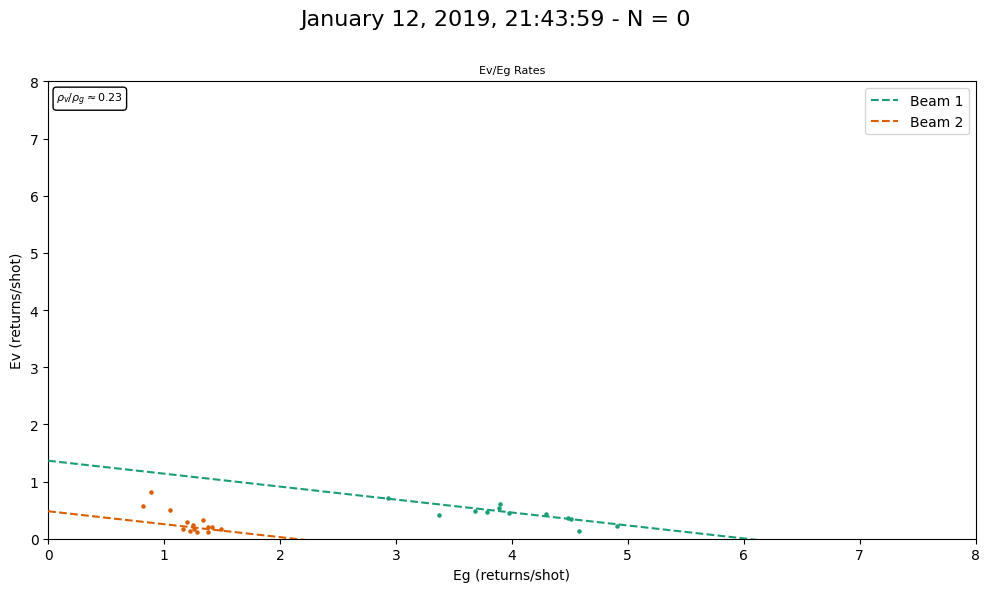

Beam 1 in file 0 has insufficient data.
Beam 2 in file 0 has insufficient data.
Beam 3 in file 0 has insufficient data.
Beam 4 in file 0 has insufficient data.
Beam 5 in file 0 has insufficient data.
Beam 6 in file 0 has insufficient data.
No beams have data in file 0, cannot regress.
Beam 1 in file 1 has insufficient data.
Beam 2 in file 1 has insufficient data.
Beam 6 in file 1 has insufficient data.


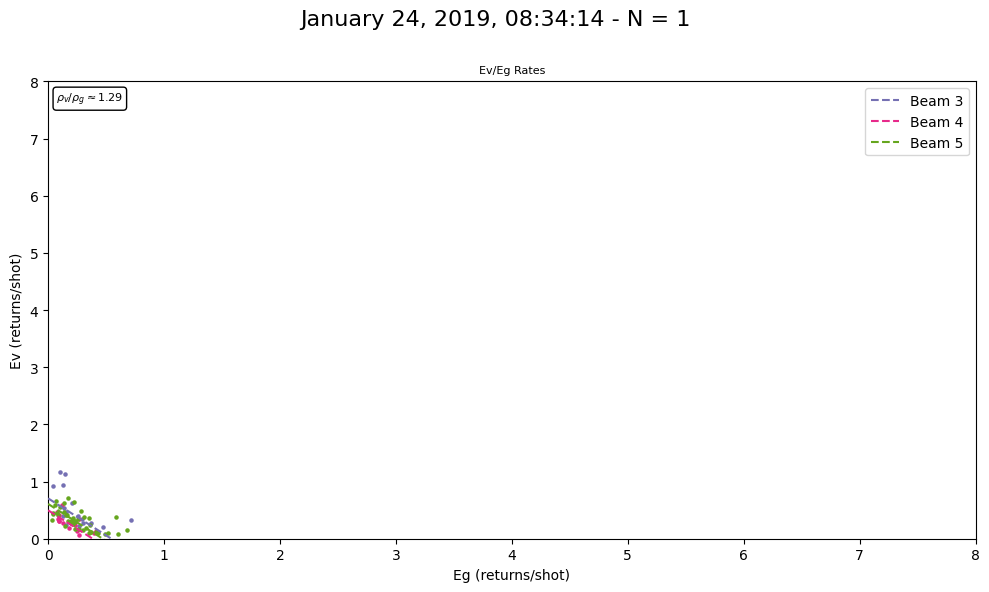

Beam 1 in file 1 has insufficient data.
Beam 2 in file 1 has insufficient data.
Beam 3 in file 1 has insufficient data.
Beam 4 in file 1 has insufficient data.
Beam 6 in file 1 has insufficient data.


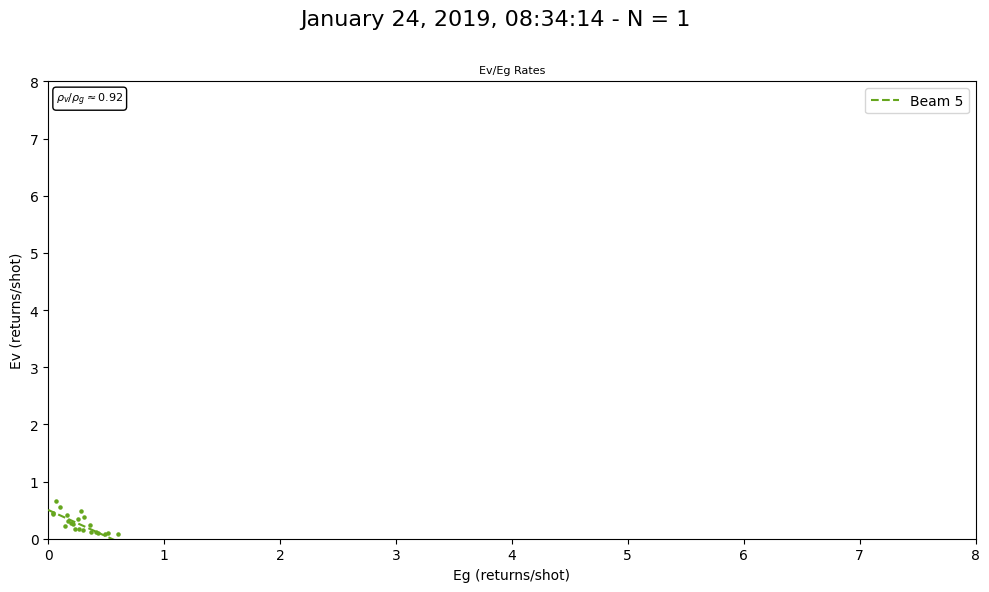

Failed to open ATL08 file for file 2's groundtrack gt3r.
Beam 3 in file 2 has insufficient data.
Beam 4 in file 2 has insufficient data.
Beam 5 in file 2 has insufficient data.
Beam 6 in file 2 has insufficient data.


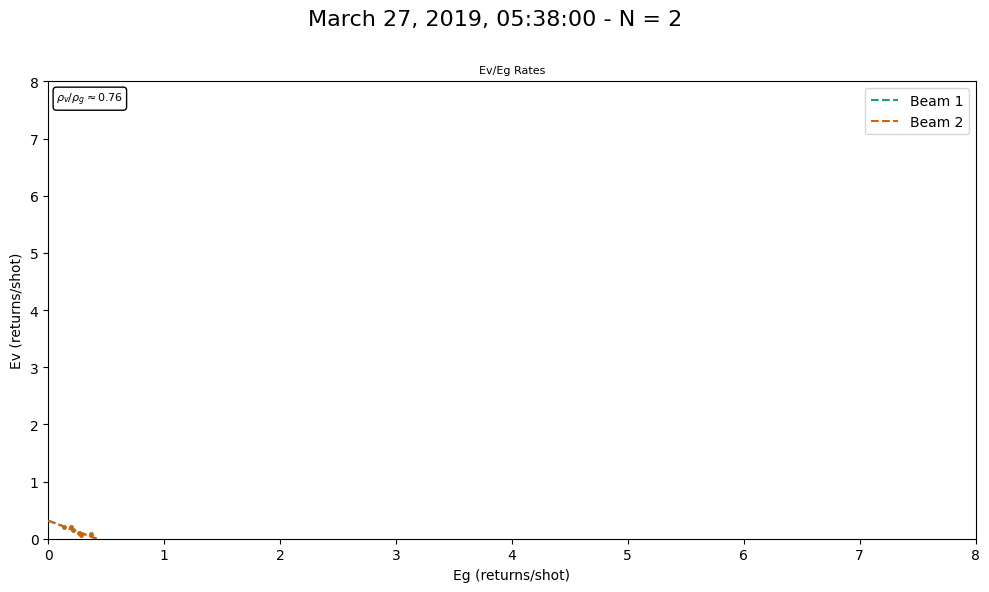

Beam 1 in file 2 has insufficient data.
Failed to open ATL08 file for file 2's groundtrack gt3r.
Beam 2 in file 2 has insufficient data.
Beam 3 in file 2 has insufficient data.
Beam 4 in file 2 has insufficient data.
Beam 5 in file 2 has insufficient data.
Beam 6 in file 2 has insufficient data.
No beams have data in file 2, cannot regress.
Beam 5 in file 3 has insufficient data.
Beam 6 in file 3 has insufficient data.


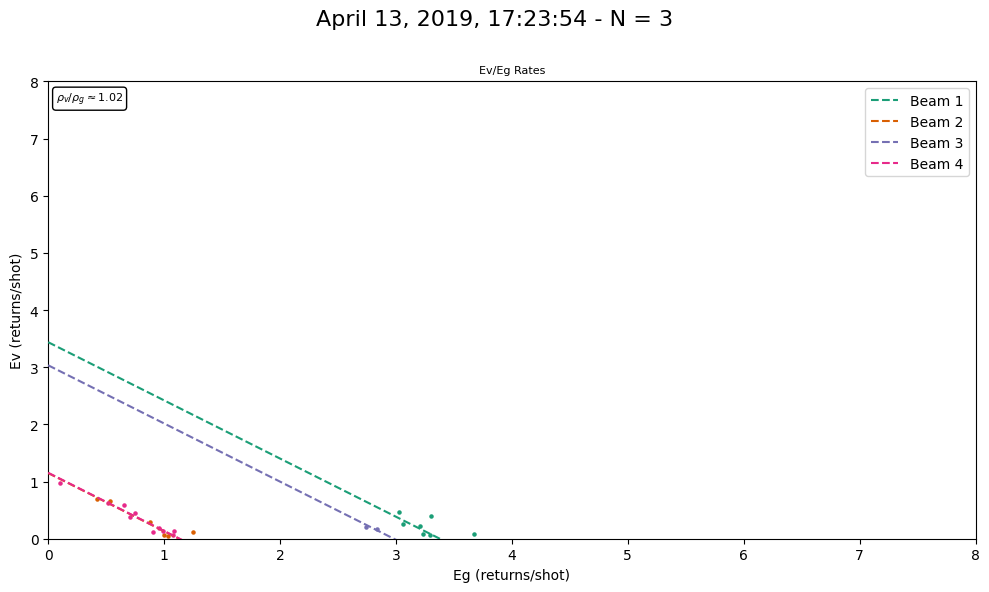

Beam 2 in file 3 has insufficient data.
Beam 3 in file 3 has insufficient data.
Beam 4 in file 3 has insufficient data.
Beam 5 in file 3 has insufficient data.
Beam 6 in file 3 has insufficient data.


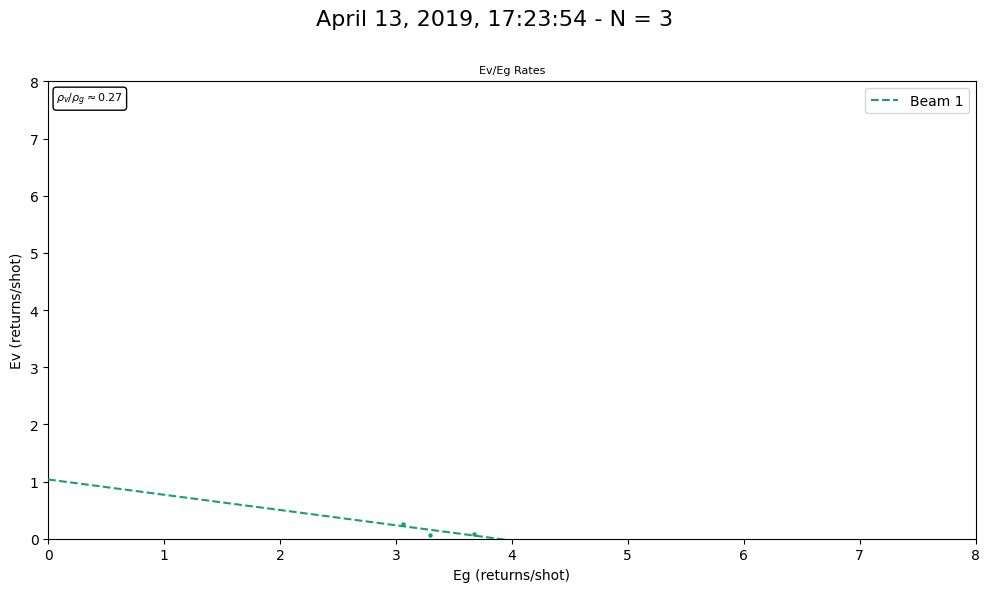

Beam 1 in file 4 has insufficient data.
Beam 2 in file 4 has insufficient data.
Beam 3 in file 4 has insufficient data.
Beam 4 in file 4 has insufficient data.


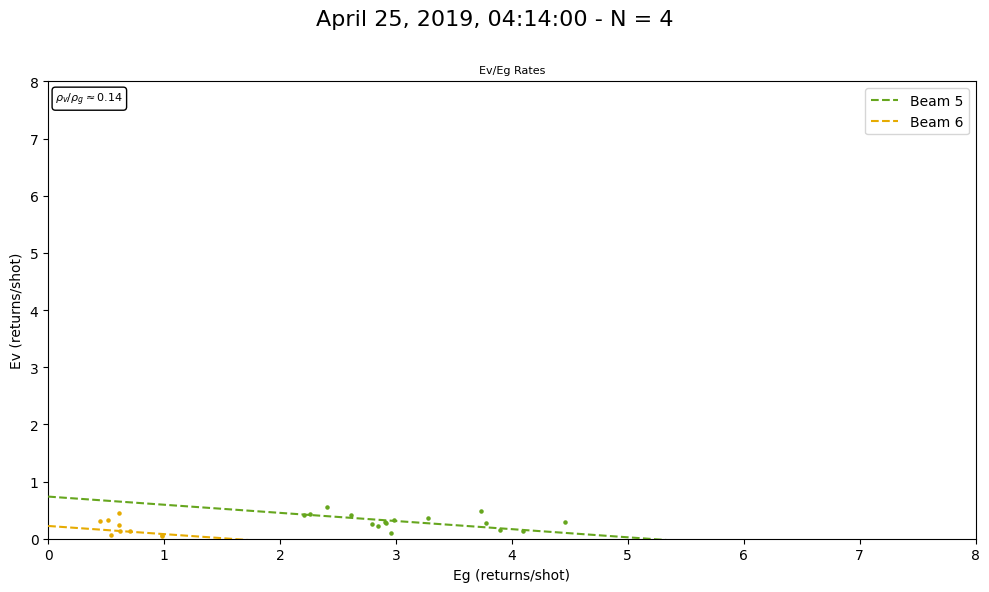

Beam 1 in file 4 has insufficient data.
Beam 2 in file 4 has insufficient data.
Beam 3 in file 4 has insufficient data.
Beam 4 in file 4 has insufficient data.


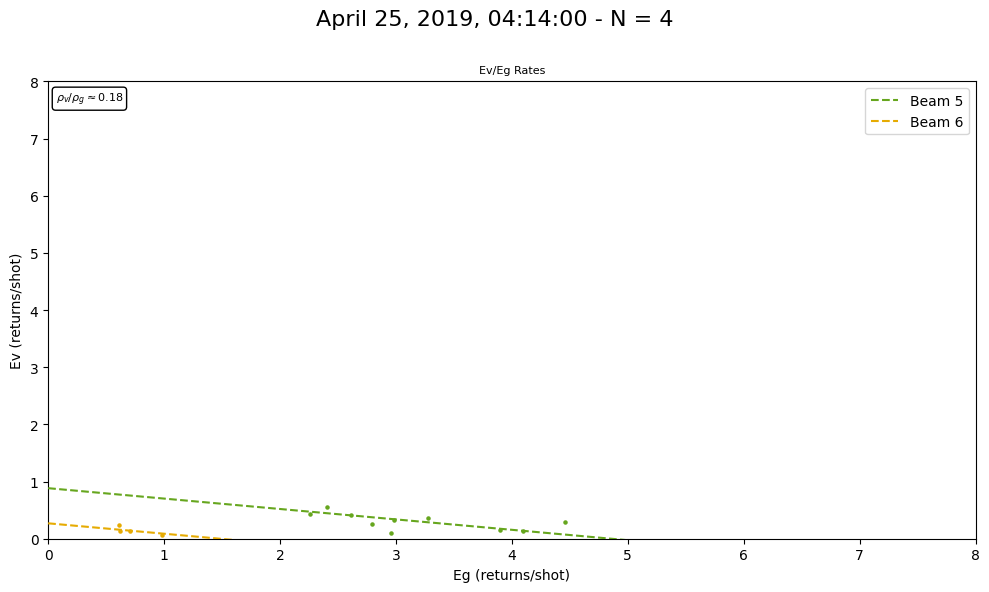

In [52]:
# from scripts.imports import *
# from scripts.show_tracks import *
# from scripts.track_pairs import *
# import geopandas as gpd
# from shapely.geometry import Point, box as shapely_box
# from scipy.optimize import least_squares
# from sklearn.metrics import r2_score, mean_squared_error
# from scripts.odr import *

# import sys

# # sys.path.insert(1,'/home/s1803229/src/PhoREAL')
# sys.path.insert(1,'C:/Users/s1803229/Documents/PhoREAL')

# from phoreal.reader import get_atl03_struct, get_atl08_struct

dirpath = '../data/sodankyla_cam'
all_ATL03, all_ATL08 = track_pairs(dirpath)
coords = (26.634154, 67.361833)
N = len(all_ATL03)
# print(all_ATL03[0],all_ATL08[0])




for i in range(0,5):
    data = pvpg_parallel(all_ATL03[i], all_ATL08[i],coords=coords, width=.05, height=.05,graph_detail=1,\
                        loss='arctan',file_index=i, keep_flagged=1, opsys='bad',f_scale=.1, altitude=185)
    data = pvpg_parallel(all_ATL03[i], all_ATL08[i],coords=coords, width=.02, height=.02,graph_detail=1,\
                        loss='arctan',file_index=i, keep_flagged=1, opsys='bad',f_scale=.1, altitude=185)
#     atl03 = get_atl03_struct(all_ATL03[i], 'gt3r', all_ATL08[i])
#     atl08 = get_atl08_struct(all_ATL08[i], 'gt3r')

# print(atl03.df.columns.values.tolist())
# print(atl08.df.columns.values.tolist())